# Kaggle 타이타닉 생존자 

참고 : https://cyc1am3n.github.io/2018/10/09/my-first-kaggle-competition_titanic.html

1. 문제 정의 : 타이타닉 호에 탑승했떤 사람들의 정보를 바탕으로 생존자 예측

2. 데이터 불러오기

    2-1. train.csv 와 test.csv를 read

In [65]:
f=open('./train.csv','r',encoding='utf-8')
train=f.read()
f.close

f=open('./test.csv','r',encoding='utf-8')
test=f.read()
f.close

#print(train)
#print(test)

<function TextIOWrapper.close()>

    2-2. 데이터 불러오기 : pandas DataFrame 이용!
    numpy와 pandas를 import

In [50]:
import numpy as np
import pandas as pd

train=pd.read_csv('./train.csv')
test=pd.read_csv('./test.csv')

#print(train.head(5))
#print(test.head(5))

'''
Pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

Age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

SibSp: The dataset defines family relations in this way... Sibling = brother, sister, stepbrother, stepsister Spouse = husband, wife (mistresses and fiancés were ignored)

Parch: The dataset defines family relations in this way... Parent = mother, father Child = daughter, son, stepdaughter, stepson Some children travelled only with a nanny, therefore parch=0 for them.
'''

print('train data shape: ', train.shape)
print('test data shape: ', test.shape)
print('----------[train infomation]----------')
print(train.info())
print('----------[test infomation]----------')
print(test.info())

train data shape:  (891, 12)
test data shape:  (418, 11)
----------[train infomation]----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
----------[test infomation]----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):


각 파일에서 누락된 정보

In [51]:

print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


3. 데이터 분석

    3-1. Pie chart for Categorical Feature

###### 참고) 주피터 노트북에서 import error 발생 시...
###### https://eatchu.tistory.com/10
###### terminal 과 주피터 환경 다를 때 발생한다


###### 주피터 실행 환경 확인

###### import sys

###### print(sys.executable)

###### c:\Users\rkfka\AppData\Local\Programs\Python\Python38\python.exe

###### pip version upgrade 필요!

###### version 다를 시 matplotlib 및 seaborn import error 발생

###### ex) ModuleFoundError : No module named "matplotlib"

###### terminal 에서 아래와 같이 입력

###### c:\Users\rkfka\AppData\Local\Programs\Python\Python38(main) -> jupyter 실행되는 환경(커널)에 접속

###### (base) λ python.exe -m pip install --upgrade pip


* Sex, Pclass, Embarked 항목에 대한 분포 확인

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

In [61]:
def pie_chart(feature):
    feature_ratio = train[feature].value_counts(sort=False)
    feature_size = feature_ratio.size
    feature_index = feature_ratio.index
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    
    plt.plot(aspect='auto')
    plt.pie(feature_ratio, labels=feature_index, autopct='%1.2f%%')
    plt.title(feature + '\'s ratio in total')
    plt.show()
    
    for i, index in enumerate(feature_index):
        plt.subplot(1, feature_size + 1, i + 1, aspect='equal')
        plt.pie([survived[index], dead[index]], labels=['Survivied', 'Dead'], autopct='%1.2f%%')
        plt.title(str(index) + '\'s ratio')
    
    plt.show()


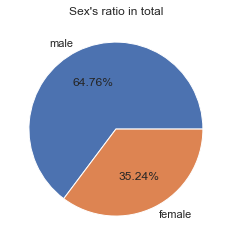

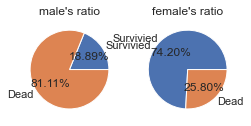

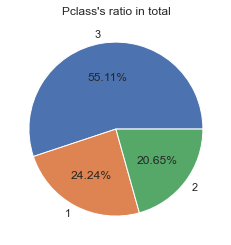

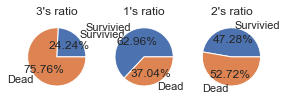

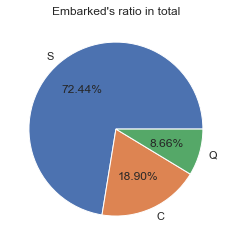

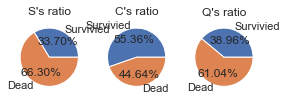

In [62]:
pie_chart('Sex')
pie_chart('Pclass')
pie_chart('Embarked')

In [ ]:
# 3-2. Bar chart for Categorical feature